![Status: Complete](https://img.shields.io/badge/status-complete-brightgreen)
![Python](https://img.shields.io/badge/python-3.10-blue)
![Coverage](https://img.shields.io/badge/coverage-90%25-green)
![License](https://img.shields.io/badge/license-MIT-green)

<a id="table-of-contents"></a>
# 📖 Classification

[🧭 Problem Statement](#-objective)
- [📌 What is Classification?](#-what-is-classification)

[📂 Data Setup](#-data-setup)
- [📥 Load Dataset](#-load-dataset)
- [🧹 Preprocessing](#-preprocessing)

[🧪 Baseline Classifier Model](#-baseline-model)    
- [📊 Model Evaluation](#-evaluation-baseline)    
- [📉 Confusion Matrix](#-confusion-matrix-baseline)    
- [📈 ROC Curve / AUC](#-roc-auc-baseline)    
- [📏 Precision / Recall / F1](#-prf-metrics-baseline)    

[🔍 Algorithms](#-models)
- [📊 Logistic Regression](#-logistic-regression)
- [🧮 Naive Bayes](#-naive-bayes)
- [🌳 Decision Tree](#-decision-tree)
- [🌲 Random Forest](#-random-forest)
- [🎯 KNN (K-Nearest Neighbors)](#-knn-k-nearest-neighbors)
- [📈 SVM (Support Vector Machines)](#-svm-support-vector-machines)
- [🚀 XGBoost](#-xgboost)
- [🧠 Neural Network](#-neural-network)

[📊 Model Exploration](#-model-exploration)
- [📈 Model Comparison](#-model-comparison)
- [📊 Feature Importance](#-feature-importance)
- [🧬 SHAP Values](#-shap-values)

[🛠️ Fine-Tune](#-tuning)
- [🔎 Grid Search](#-grid-search)
- [🎲 Randomized Search](#-randomized-search)

[🔀 Ensemble Methods](#-ensemble-methods)
- [🗳️ Voting Classifier](#-voting-classifier)
- [🧬 Stacking Classifier](#-stacking-classifier)
- [🪵 Bagging](#-bagging)
- [🚀 Boosting](#-boosting)


[📦 Export & Deployment](#-export--deployment-optional)

<hr style="border: none; height: 1px; background-color: #ddd;" />


<a id="objective"></a>
# 🧭 Problem Statement



<a id="what-is-classification"></a>
#### 📌 What is Classification?

<details><summary><strong>📖 Click to Expand</strong></summary>
Classification is a type of supervised machine learning where the goal is to predict a categorical label for an observation. Given a set of features (input data), the model tries to assign the observation to one of several predefined classes. Common examples of classification problems include:
- **Spam detection**: Classifying emails as spam or not.
- **Customer churn prediction**: Classifying customers as likely to leave (churn) or stay based on their activity.
- **Image recognition**: Classifying images into categories, like identifying animals, vehicles, etc.

In classification, the output is discrete (e.g., 'spam' vs 'not spam', 'churn' vs 'no churn'). This contrasts with regression, where the output is continuous (e.g., predicting a house price).

##### Key Points
- Supervised learning approach.
- Used for predicting categories.
- Output is discrete (binary or multiclass).
- Examples: email classification, disease diagnosis, fraud detection.

</details>





[Back to the top](#table-of-contents)
___

<a id="data-setup"></a>
# 📂 Data Setup



<a id="load-dataset"></a>
#### 📥 Load Dataset



In [60]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Machine Learning and Model Evaluation
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, TimeSeriesSplit, KFold
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Statistical and Other Utilities
from scipy.stats import zscore
from termcolor import colored

# Visualization
import matplotlib.pyplot as plt

<details><summary><strong>📖 Click to Expand</strong></summary>
In this section, we will begin by preparing the dataset. For simplicity, we'll use a simulated classification dataset generated using the `make_classification` function from `sklearn`. This allows us to create a synthetic dataset that is suitable for practicing classification tasks.

We will simulate a dataset with the following properties:
- 1000 samples (observations)
- 10 features (predictors)
- 2 informative features (ones that help in prediction)
- 2 classes (binary classification problem)

Let's generate and take a look at the data.

</details>

In [61]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

# Simulate base classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    weights=[0.7, 0.3],  # simulate class imbalance
    flip_y=0.01,         # 1% label noise
    class_sep=0.8,       # less separation = harder task
    random_state=42
)

# Create DataFrame
df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 11)])
target_col = "Target" 
df[target_col] = y

# Inject missing values randomly (e.g., 1% of cells)
# mask = np.random.rand(*df.shape) < 0.01
# df[mask] = np.nan

# Display preview
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,0.959085,-0.066449,0.918572,-0.358079,0.997266,1.181890,-1.415679,-1.210161,-0.828077,1.227274,0
1,-0.910796,-0.566395,-0.940419,0.831617,-1.176962,1.820544,1.552375,-0.984534,0.563896,0.209470,1
2,-0.103769,-0.432774,-0.389454,0.793818,-0.268646,-1.836360,1.039086,-0.246383,-0.858145,-0.297376,1
3,1.580930,2.023606,1.542262,0.006800,-1.607661,0.184741,-2.419427,-0.357445,-1.273127,-0.190039,0
4,-0.006898,-0.711303,0.139918,0.117124,1.536061,0.597538,-0.437329,-0.939156,0.484698,0.236224,0


<a id="data-characteristics-dictionary"></a>

#### 📊 Data Characteristics Dictionary

<details><summary><strong>📖 Click to Expand </strong></summary>

This section initializes the **data characteristics dictionary**, which will store various metadata about the dataset, including details about the target variable, features, data size, and linear separability.

The dictionary contains the following key sections:

1. **🎯 Target Variable**:
   - **Type**: Specifies whether the target variable is **binary** or **multiclass**.
   - **Imbalance**: Indicates whether the target variable has **class imbalance**.
   - **Class Imbalance Severity**: Specifies the severity of the imbalance (e.g., **high**, **low**).

2. **🔧 Features**:
   - **Type**: Describes the type of features in the dataset (e.g., **categorical**, **continuous**, or **mixed**).
   - **Correlation**: Indicates the correlation between features (e.g., **low**, **medium**, **high**).
   - **Outliers**: Flag to indicate whether **outliers** are detected in the features.
   - **Missing Data**: Tracks the percentage of **missing data** or flags missing values.

3. **📈 Data Size**:
   - **Size**: Contains the **number of samples** (rows) and **number of features** (columns).

4. **🔍 Linear Separability**:
   - **Linear Separability**: States whether the classes are **linearly separable** (True or False).

This dictionary will be updated dynamically as we analyze the dataset in subsequent steps. It serves as a **summary of key dataset properties** to help guide further analysis and modeling decisions.

</details>


In [62]:
# Initialize the data characteristics dictionary
data_characteristics = {
    "target_variable": {
        "type": None,  # "binary", "multiclass"
        "imbalance": None,  # True if imbalanced, False otherwise
        "class_imbalance_severity": None  # e.g., "high", "low"
    },
    "features": {
        "type": None,  # "categorical", "continuous", "mixed"
        "correlation": None,  # "low", "medium", "high"
        "outliers": None,  # True if outliers detected, False otherwise
        "missing_data": None  # Percentage of missing data or boolean
    },
    "data_size": None,  # Size of dataset (samples, features)
    "linear_separability": None  # True if classes are linearly separable
}

model_results = {}  # model performance dict


#### EDA

In [63]:
# udpate data_characteristics

#### Feature Engineering

<a id="preprocessing"></a>
#### 🧹 Preprocessing



In [64]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=target_col)
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("✅ Data split complete:")
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


✅ Data split complete:
Train size: 800, Test size: 200


[Back to the top](#table-of-contents)
___



<a id="baseline-model"></a>
# 🧪 Baseline Classifier Model

<details><summary><strong>📖 Click to Expand </strong></summary>

In this section, we define the **baseline model** for the classification task. The baseline model is typically a **dummy model** that can be used to compare against more sophisticated models. Here, we use the **DummyClassifier**, which predicts the majority class, to set a baseline performance.

The baseline model will help us assess if more advanced models (e.g., Random Forest, SVM) are making meaningful improvements over a simple strategy.

</details>

🧠 Why Track `best_model_info`?

In real-world pipelines, it's critical to:
- Compare models not just by accuracy, but a full suite of metrics.
- Store the actual model object, hyperparameters, and diagnostics in one place.
- Ensure only the **best-performing** model (based on a chosen metric like F1 or AUC) is promoted forward.

In [65]:
# Initialize Central tracker dictionary to track best model details upon iterations
best_model_info = {
    "name": None,
    "model": None,
    "metrics": {
        "train": {
            "accuracy": -np.inf,
            "precision": -np.inf,
            "recall": -np.inf,
            "f1": -np.inf,
            "roc_auc": -np.inf
            # Note: confusion_matrix and classification_report omitted for train
            # because they're redundant and cluttered for internal training fit
        },
        "test": {
            "accuracy": -np.inf,
            "precision": -np.inf,
            "recall": -np.inf,
            "f1": -np.inf,
            "roc_auc": -np.inf,
            "confusion_matrix": None,
            "classification_report": None
        }
    },
    "hyperparameters": None
}

# Dictionary to store all model results for comparison
model_results = {}

In [66]:
# Metric to decide which model is "best"
# Common choices (ranked by practical usage):
# 1. "f1"        → balanced precision/recall (default choice, esp. with class imbalance)
# 2. "roc_auc"   → good for imbalanced classes, uses probability scores
# 3. "accuracy"  → only when classes are balanced and all errors are equal
# 4. "precision" → when false positives are costly (e.g., spam detection)
# 5. "recall"    → when false negatives are costly (e.g., fraud, cancer)

# Success metric used to select the best model
success_metric = "f1"  # or "roc_auc", depending on use case
# success_split = "test"  # "train" or "test"

In [67]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Fit a dummy classifier as a baseline
dummy_clf = DummyClassifier(strategy="most_frequent")  # or try "stratified", "uniform"
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [68]:
# Predict on both train and test
y_train_pred = dummy_clf.predict(X_train)
y_test_pred = dummy_clf.predict(X_test)

<a id="evaluation-baseline"></a>
#### 📊 Model Evaluation

<details><summary><strong>📖 Click to Expand</strong></summary>

- **Accuracy**: Overall correctness. Misleading when classes are imbalanced.
- **Precision**: Of predicted positives, how many are truly positive? Important when false positives are costly.
- **Recall**: Of actual positives, how many did we catch? Crucial when missing positives is expensive.
- **F1 Score**: Harmonic mean of precision and recall. Useful when you care about balance.
- **ROC AUC**: Probability a random positive ranks above a random negative. Good for probability-based classifiers.

</details>

<details>
<summary><strong>📖 Click to Expand</strong></summary>

**Precision, Recall, and F1 Score** are classification metrics that help us understand model performance beyond just accuracy:

- **Precision**: Of all predicted positives, how many were actually correct? (Low precision = many false alarms)
- **Recall**: Of all actual positives, how many did we catch? (Low recall = missed positives)
- **F1 Score**: Harmonic mean of precision and recall — useful when classes are imbalanced.

**Business Perspective**:
- If false positives are costly (e.g., spam filters, fraud flags), precision matters more.
- If missing positives is risky (e.g., cancer detection), recall is critical.
- F1 balances both and gives a single, interpretable metric.

These metrics are vital when accuracy is misleading — especially in skewed datasets.
</details>

In [69]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Technical output
print("📉 Classification Report\n")
print(classification_report(y_test, y_test_pred))

📉 Classification Report

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       140
           1       0.00      0.00      0.00        60

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.49      0.70      0.58       200



/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Determine positive class once
positive_class = y_train.unique()[1] if len(y_train.unique()) == 2 else 1

def evaluate_model(y_true, y_pred, label="Model"):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label=positive_class, average='binary', zero_division=0)
    rec  = recall_score(y_true, y_pred, pos_label=positive_class, average='binary', zero_division=0)
    f1   = f1_score(y_true, y_pred, pos_label=positive_class, average='binary', zero_division=0)

    # Aligned core metrics
    print(f"\n📊 {label} — Performance Summary:")
    print(f"- Accuracy  : {acc :>7.2%} → Overall correctness.")
    print(f"- Precision : {prec:>7.2%} → Of predicted '{positive_class}', how many were right.")
    print(f"- Recall    : {rec :>7.2%} → Of actual '{positive_class}', how many we caught.")
    print(f"- F1 Score  : {f1  :>7.2%} → Balance of precision & recall.")

    # Business interpretation
    print("\n📌 Interpretation:")
    if prec < 0.6:
        print("- High false positives → risky if false alarms are costly.")
    else:
        print("- Precision looks acceptable; false positives under control.")

    if rec < 0.6:
        print("- High false negatives → risky if missing positives is costly.")
    else:
        print("- Recall is strong; model is catching true cases well.")

    print(f"- F1 Score shows overall tradeoff quality: {f1:.2f}")

# Example usage
evaluate_model(y_test, y_test_pred, label="Baseline Classifier")


📊 Baseline Classifier — Performance Summary:
- Accuracy  :  70.00% → Overall correctness.
- Precision :   0.00% → Of predicted '1', how many were right.
- Recall    :   0.00% → Of actual '1', how many we caught.
- F1 Score  :   0.00% → Balance of precision & recall.

📌 Interpretation:
- High false positives → risky if false alarms are costly.
- High false negatives → risky if missing positives is costly.
- F1 Score shows overall tradeoff quality: 0.00


<a id="confusion-matrix-baseline"></a>
#### 📉 Confusion Matrix


<details>
<summary><strong>📖 Click to Expand</strong></summary>

The confusion matrix is a NxN table that helps us visualize the performance of a classification model.  

📖 Confusion Matrix Terminology:
- **True Positive (TP)**: Actual = Positive, Predicted = True-ly 
- **False Positive (FP)**: Actual = Negative, Predicted = False-ly  
- **True Negative (TN)**: Actual = Negative, Predicted = True-ly
- **False Negative (FN)**: Actual = Positive, Predicted = False-ly

```
                  Predicted
                ┌───────────────┐
                │     0   │   1 │
         ┌──────┼─────────┼─────┤
Actual   │  0   │   TN    │  FP │  ← Specificity = TN / (TN + FP) = True Negative Rate (TNR)
         │  1   │   FN    │  TP │  ← Recall = TP / (TP + FN) = Sensitivity, TPR, Hit Rate
         └──────┴─────────┴─────┘
                              ↑
                              └─ Precision = TP / (TP + FP) = Positive Predictive Value 
```
</details>


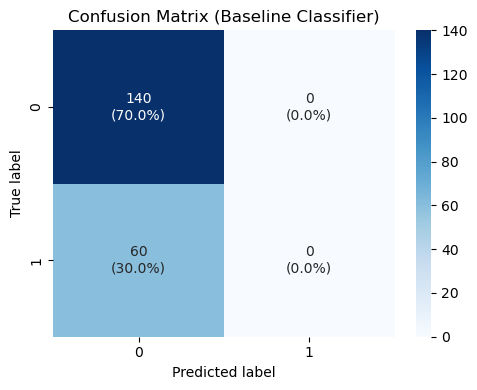

In [71]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion(y_true, y_pred, model_name="Model"):
    """
    Plot a confusion matrix with count and percentage annotations.
    Warns if y_pred contains unseen labels not present in y_true.
    """
    # Robust label set
    labels = np.unique(np.concatenate([y_true, y_pred]))
    
    # Check for potential leakage or mismatch
    unseen_preds = set(y_pred) - set(y_true)
    if unseen_preds:
        print(f"\033[91m⚠️ Warning: y_pred contains unseen class labels: {unseen_preds} — "
              f"this may indicate leakage or label mismatch.\033[0m")

    # Compute confusion matrix and percentages
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm)
    cm_perc = cm / cm_sum * 100

    # Annotate with count and %
    annot = np.empty_like(cm).astype(str)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            c = cm[i, j]
            p = cm_perc[i, j]
            annot[i, j] = f"{c}\n({p:.1f}%)"

    # Plot
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=annot, fmt="", cmap="Blues", cbar=True,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.tight_layout()
    plt.show()

plot_confusion(y_test, y_test_pred, model_name="Baseline Classifier")


<a id="roc-auc-baseline"></a>
#### 📈 ROC Curve / AUC

<details><summary><strong>📖 Click to Expand</strong></summary>

**ROC Curve** (Receiver Operating Characteristic) plots the True Positive Rate (TPR) vs False Positive Rate (FPR) across different threshold values.

- A model that randomly guesses would fall along the diagonal (AUC = 0.5)
- A perfect model hugs the top-left corner (AUC = 1.0)

**AUC (Area Under the Curve)** quantifies overall separability between the two classes:
- **Technical Insight**: Higher AUC means better discrimination between positive and negative cases.
- **Business Relevance**: Especially useful when false positives and false negatives have different costs — like fraud detection, churn prediction, etc.

This plot lets stakeholders quickly gauge how good the model is — regardless of classification threshold.
</details>


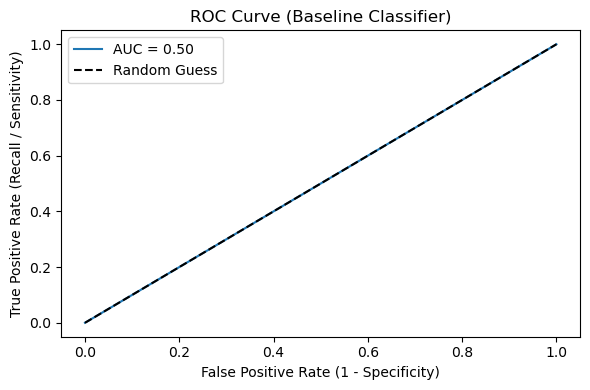

🔹 ROC AUC Score for Baseline Classifier: 0.5000
📌 Interpretation: Model performs at or near random. It cannot meaningfully separate classes.


In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_auc(model, X_test, y_test, model_name="Model"):
    """
    Plot ROC curve, print AUC score, and give business-facing interpretation.
    """
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        raise ValueError("Model does not support probability estimates or decision function.")
    
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)
    
    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Recall / Sensitivity)")
    plt.title(f"ROC Curve ({model_name})")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Output
    print(f"🔹 ROC AUC Score for {model_name}: {auc_score:.4f}")
    if auc_score <= 0.55:
        print("📌 Interpretation: Model performs at or near random. It cannot meaningfully separate classes.")
    elif auc_score < 0.7:
        print("📌 Interpretation: Some separability, but not reliable yet. Needs improvement.")
    else:
        print("📌 Interpretation: Model is doing a good job distinguishing between classes.")

plot_roc_auc(dummy_clf, X_test, y_test, model_name="Baseline Classifier")


#### Update Best Model Info

In [75]:
from termcolor import colored
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

def update_best_model(model_name, model_obj, y_train, y_test, y_train_pred, y_test_pred, hyperparameters=None):
    """
    Computes metrics internally, updates best_model_info if model outperforms current best.
    Also logs all model results.
    """
    # Evaluate performance
    metrics = {
        "train": {
            "accuracy": accuracy_score(y_train, y_train_pred),
            "precision": precision_score(y_train, y_train_pred, pos_label=positive_class, zero_division=0),
            "recall": recall_score(y_train, y_train_pred, pos_label=positive_class, zero_division=0),
            "f1": f1_score(y_train, y_train_pred, pos_label=positive_class, zero_division=0),
            "roc_auc": roc_auc_score(y_train, model_obj.predict_proba(X_train)[:, 1])
        },
        "test": {
            "accuracy": accuracy_score(y_test, y_test_pred),
            "precision": precision_score(y_test, y_test_pred, pos_label=positive_class, zero_division=0),
            "recall": recall_score(y_test, y_test_pred, pos_label=positive_class, zero_division=0),
            "f1": f1_score(y_test, y_test_pred, pos_label=positive_class, zero_division=0),
            "roc_auc": roc_auc_score(y_test, model_obj.predict_proba(X_test)[:, 1]),
            "confusion_matrix": confusion_matrix(y_test, y_test_pred),
            "classification_report": classification_report(y_test, y_test_pred, output_dict=True)
        }
    }

    # Compare with current best
    current_score = metrics["test"][success_metric]
    best_score = best_model_info["metrics"]["test"].get(success_metric, -1)
    previous_best = best_model_info["name"] or "None"

    if current_score > best_score:
        best_model_info.update({
            "name": model_name,
            "model": model_obj,
            "metrics": metrics,
            "hyperparameters": hyperparameters or {}
        })
        print(colored(
            f"✅ {model_name} just beat previous best ({previous_best}) → "
            f"{success_metric}: {best_score:.4f} → {current_score:.4f}", "green"))
        # print(f"📊 Current Test Performance:")
        # for metric in ["accuracy", "precision", "recall", "f1", "roc_auc"]:
        #     val = metrics["test"][metric]
        #     print(f"- {metric.capitalize():<9}: {val:.4f}")

    # Log all model results
    model_results[model_name] = {
        "model": model_obj,
        "metrics": metrics,
        "hyperparameters": hyperparameters or {}
    }

In [76]:
update_best_model(
    model_name="DummyClassifier",
    model_obj=dummy_clf,
    y_train=y_train,
    y_test=y_test,
    y_train_pred=y_train_pred,
    y_test_pred=y_test_pred,
    hyperparameters={"strategy": "most_frequent"}
)

/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashrithreddy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
# from pprint import pprint
# pprint(best_model_info)
# pprint(model_results)


[Back to the top](#table-of-contents)
___




<a id="models"></a>
# 🔍 Algorithms



<a id="logistic-regression"></a>
#### 📊 Logistic Regression



<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🔍 What is Logistic Regression?

Despite the name, **Logistic Regression** is used for classification — not regression.  
It predicts the **probability** that an observation belongs to a certain class (e.g., 0 or 1).  
Under the hood, it fits a weighted formula to the input features, applies a sigmoid function, and outputs a value between 0 and 1.

> Example:  
> A model might say there's a **78% chance** this customer will churn.  
> If that crosses a certain threshold (say, 50%), we classify it as “Yes.”

##### ✅ Pros vs ❌ Cons

| Pros                              | Cons                                  |
|-----------------------------------|---------------------------------------|
| Fast and efficient                | Assumes linear relationship (log-odds) |
| Easy to interpret (feature weights) | Doesn’t handle complex patterns well  |
| Works well with small datasets    | Sensitive to multicollinearity        |
| Outputs probabilities             | May underperform on nonlinear data    |

##### 🧠 When to Use

Use Logistic Regression when:
- You want a **quick baseline** with interpretable output
- You care about **probabilities**, not just labels
- Your data is fairly **linearly separable**
- The number of features is small to medium

##### ⚠️ Pitfalls & Hacks

- **Pitfall**: If features are highly correlated (multicollinearity), the model may become unstable. Use regularization (e.g., L2 penalty).
- **Hack**: For imbalanced datasets, adjust the threshold or use `class_weight='balanced'` to avoid bias toward the majority class.
- **Tip**: Standardize features before training, especially if using regularization.

</details>

<a id="naive-bayes"></a>
#### 🧮 Naive Bayes



<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🔍 What is Naive Bayes?

Naive Bayes is a family of **probabilistic classifiers** based on Bayes’ Theorem.  
It assumes that all features are **independent** of each other — which is rarely true in practice, but the model still performs surprisingly well.

It calculates the probability of each class given the input features and picks the class with the highest likelihood.

> Example:  
> “Given these symptoms, what’s the most probable disease?” — Naive Bayes is widely used in text classification, spam detection, and medical diagnosis.

##### ✅ Pros vs ❌ Cons

| Pros                               | Cons                                  |
|------------------------------------|---------------------------------------|
| Very fast and scalable             | Assumes feature independence (naive)  |
| Handles high-dimensional data well | May underperform with correlated inputs |
| Simple and interpretable           | Struggles with numeric feature scaling |
| Works well with text data          | Outputs are often overconfident       |

##### 🧠 When to Use

Use Naive Bayes when:
- You’re working with **text** (e.g., spam filters, sentiment)
- You want a **fast baseline**
- You’re dealing with **high-dimensional**, sparse features (like TF-IDF)
- You have clean categorical or binary features

##### ⚠️ Pitfalls & Hacks

- **Pitfall**: Doesn’t handle continuous features naturally — convert them to bins or use GaussianNB.
- **Hack**: Apply **Laplace smoothing** to handle zero probabilities in unseen combinations.
- **Tip**: Don’t expect high accuracy on raw numeric data — it shines in text-like scenarios.

</details>


<a id="decision-tree"></a>
#### 🌳 Decision Tree

<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🔍 What is a Decision Tree?

A Decision Tree splits data into branches based on feature values, creating a flowchart-like structure.  
Each split is chosen to maximize class separation (typically using Gini impurity or entropy).  
The result is a set of human-readable rules — like:  
“If age < 30 and income > 50K → likely to churn.”

It’s intuitive and easy to explain, even to non-technical stakeholders.

##### ✅ Pros vs ❌ Cons

| Pros                             | Cons                                 |
|----------------------------------|--------------------------------------|
| Easy to visualize and interpret  | Prone to overfitting on noisy data   |
| No need for feature scaling      | Can create unstable splits           |
| Captures non-linear relationships | Doesn’t generalize well on small data |
| Works for both numeric and categorical | Can be biased toward dominant features |

##### 🧠 When to Use

Use Decision Trees when:
- You need a model that’s **explainable** (e.g., in regulated domains)
- Your data has **mixed types** (numeric + categorical)
- You want to **prototype quickly** and understand feature importance
- You’re okay with less predictive power in favor of interpretability

##### ⚠️ Pitfalls & Hacks

- **Pitfall**: Deep trees can memorize the training data — always prune or set `max_depth`.
- **Hack**: Use as a weak learner inside ensembles (like Random Forest or XGBoost) to improve performance.
- **Tip**: Use feature importance from trees to guide feature selection for other models.

</details>

<a id="random-forest"></a>
#### 🌲 Random Forest

<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🔍 What is a Random Forest?

Random Forest is an **ensemble method** that builds many decision trees and combines their outputs.  
Each tree sees a random subset of the data and features, making the forest **diverse and robust**.

It works by aggregating the predictions of multiple trees (majority vote for classification), reducing the overfitting risk of a single decision tree.

> Think of it as a crowd of weak models working together to make better predictions.

##### ✅ Pros vs ❌ Cons

| Pros                                  | Cons                                   |
|---------------------------------------|----------------------------------------|
| Strong performance out of the box     | Less interpretable than a single tree  |
| Handles non-linearities and interactions | Slower for real-time predictions     |
| Resistant to overfitting              | May require tuning to perform well     |
| Works well with large feature spaces  | Not ideal when interpretability is key |

##### 🧠 When to Use

Use Random Forest when:
- You need a **reliable general-purpose model** with minimal tuning
- You want to **improve stability** over a single decision tree
- Your data is **tabular and structured**
- You care more about **performance** than full interpretability

##### ⚠️ Pitfalls & Hacks

- **Pitfall**: May become large and slow — tune `n_estimators` and `max_depth` if needed
- **Hack**: Use `feature_importances_` to find influential variables
- **Tip**: Avoid one-hot encoding with high-cardinality features — use label encoding instead

</details>


<a id="knn"></a>
#### 🎯 KNN (K-Nearest Neighbors)

<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🔍 What is K-Nearest Neighbors?

KNN is a **non-parametric**, instance-based learning method.  
It doesn’t learn a model during training — instead, it stores the data.  
At prediction time, it looks at the **K most similar observations** (neighbors) and assigns the class based on majority vote.

Similarity is usually measured using **Euclidean distance** (or other distance metrics for different data types).

> Example:  
> “To predict a label for this point, look at its 5 closest data points and choose the most common class.”

##### ✅ Pros vs ❌ Cons

| Pros                                 | Cons                                      |
|--------------------------------------|-------------------------------------------|
| Simple and intuitive                 | Slow at prediction time (no training step) |
| No training required                 | Struggles with high-dimensional data       |
| Captures local patterns              | Requires feature scaling                  |
| Flexible distance metrics            | Memory-intensive with large datasets      |

##### 🧠 When to Use

Use KNN when:
- You have **low-dimensional**, clean data
- You want to **prototype quickly** with minimal assumptions
- You care about **local behavior** rather than global rules
- Interpretability is less important than flexibility

##### ⚠️ Pitfalls & Hacks

- **Pitfall**: Distance metrics break down in high-dimensional space (curse of dimensionality)
- **Hack**: Use `StandardScaler` or `MinMaxScaler` to normalize features before fitting
- **Tip**: Tune `k` using cross-validation; odd numbers help avoid ties in binary classification

</details>


<a id="svm"></a>
#### 📈 SVM (Support Vector Machines)

<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🔍 What is SVM?

Support Vector Machines (SVM) are **margin-based classifiers** that try to find the best boundary (hyperplane) that separates classes.  
SVM focuses on **support vectors** — the critical data points closest to the boundary — to maximize the margin between classes.

It can handle **non-linear patterns** using kernel tricks (e.g., RBF kernel), making it flexible for complex data.

> Think of it as drawing the widest possible gap between two classes while avoiding overlap.

##### ✅ Pros vs ❌ Cons

| Pros                                 | Cons                                   |
|--------------------------------------|----------------------------------------|
| Works well in high-dimensional spaces | Slow on large datasets                 |
| Effective for non-linear boundaries   | Requires careful parameter tuning      |
| Robust to overfitting (with regularization) | Not intuitive to interpret         |
| Supports different kernels            | Doesn’t scale well with noisy data     |

##### 🧠 When to Use

Use SVM when:
- Your data is **high-dimensional**, but you want a **non-linear model**
- You need a **strong classifier** and have time to tune hyperparameters
- Dataset is **moderate in size** and reasonably clean
- You care about maximizing **margin of separation**

##### ⚠️ Pitfalls & Hacks

- **Pitfall**: Doesn't output probabilities by default — use `probability=True` in `SVC` if needed
- **Hack**: Use **RBF kernel** as a good starting point for non-linear problems
- **Tip**: Always standardize features — SVM is sensitive to feature scale

</details>

<a id="xgboost"></a>
#### 🚀 XGBoost



<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🔍 What is XGBoost?

XGBoost (Extreme Gradient Boosting) is a powerful **boosted tree ensemble** method.  
Unlike Random Forest (which builds trees in parallel), XGBoost builds trees **sequentially** — each new tree tries to fix the errors of the previous one.

It uses **gradient descent** to minimize loss, with regularization to prevent overfitting.  
XGBoost is known for its **speed, accuracy, and efficiency**, making it a go-to model in many Kaggle competitions and production systems.

##### ✅ Pros vs ❌ Cons

| Pros                                 | Cons                                   |
|--------------------------------------|----------------------------------------|
| High predictive accuracy             | Harder to interpret                    |
| Built-in regularization (less overfitting) | More complex than basic tree models |
| Fast and scalable                    | Requires tuning for best performance   |
| Handles missing data automatically   | May overfit small/noisy datasets       |

##### 🧠 When to Use

Use XGBoost when:
- You need **top-tier performance** on structured/tabular data
- You’re working with **noisy or complex relationships**
- You’re okay with a black-box model in exchange for results
- You want built-in tools for **feature importance**, early stopping, etc.

##### ⚠️ Pitfalls & Hacks

- **Pitfall**: Easy to overfit if `n_estimators` is too high — always monitor with validation
- **Hack**: Use `early_stopping_rounds` during training to auto-pick optimal iteration
- **Tip**: Start with basic settings and use `GridSearchCV` or `Optuna` for tuning

</details>


<a id="neural-net"></a>
#### 🧠 Neural Network

<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🔍 What is a Neural Network?

A Neural Network is a layered structure of interconnected "neurons" inspired by the human brain.  
Each neuron applies a weighted transformation followed by a non-linear activation, allowing the model to learn **complex, non-linear patterns** in the data.

Even a basic feedforward neural network (also called Multi-Layer Perceptron or MLP) can approximate intricate decision boundaries — making it powerful but harder to interpret.

> Think of it as a flexible function builder that learns patterns layer by layer.

##### ✅ Pros vs ❌ Cons

| Pros                                  | Cons                                   |
|---------------------------------------|----------------------------------------|
| Can model complex, non-linear relationships | Requires lots of data and tuning     |
| Works well on both tabular and image/text data | Not interpretable out of the box |
| Scales with data and compute          | Can overfit if not regularized        |
| Highly customizable architectures     | Slower to train, harder to debug      |

##### 🧠 When to Use

Use Neural Networks when:
- You have **enough data** and want to model **complex interactions**
- You're comfortable with longer training and tuning
- You care more about **predictive power** than explainability
- You're building pipelines that could benefit from **deep learning extensions** later

##### ⚠️ Pitfalls & Hacks

- **Pitfall**: Prone to overfitting — always use dropout, regularization, or early stopping
- **Hack**: Use a simple architecture (1–2 hidden layers) for structured/tabular data
- **Tip**: Standardize inputs and tune learning rate; training can otherwise stall or explode

</details>


[Back to the top](#table-of-contents)
___

<a id="model-exploration"></a>
# 📊 Model Exploration


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

model_registry = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),  # needed for ROC AUC
    # "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Neural Network": MLPClassifier(max_iter=1000)
}


<a id="model-comparison"></a>
#### 📈 Model Comparison

In [ ]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix, log_loss
)

for name, model in model_registry.items():
    print(f"\n🔧 Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = y_pred

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Metrics
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_scores)
    specificity = tn / (tn + fp)
    logloss = log_loss(y_test, y_scores)

    model_results[name] = {
        "model": model,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "auc": auc,
        "specificity": specificity,
        "log_loss": logloss
    }

    # Evaluations
    plot_confusion(y_test, y_pred, model_name=name)
    plot_roc_auc(model, X_test, y_test, model_name=name)
    print_prf_metrics(y_test, y_pred, model_name=name)
    print("—" * 80)  # horizontal line


In [ ]:
# model_results

In [ ]:
# Pick based on 'accuracy', 'precision', 'recall', 'f1', 'auc', 'specificity', 'log_loss'
criteria = "accuracy"

# Identify the best model based on selected criteria
best_model_name = max(model_results, key=lambda x: model_results[x][criteria])
best_model = model_results[best_model_name]["model"]
best_score = model_results[best_model_name][criteria]

print(f"\n🏆 Best model so far: {best_model_name} ({criteria.upper()} = {best_score:.4f})")


In [ ]:
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd

# Replace with your actual results dictionary
df_results = pd.DataFrame(model_results).T

# Metrics to visualize
metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc', 'specificity']

# Create subplot layout (3 rows x 2 columns)
fig = sp.make_subplots(rows=3, cols=2, subplot_titles=[m.upper() for m in metrics])

# Add bar chart to each subplot
for i, metric in enumerate(metrics):
    row, col = divmod(i, 2)
    fig.add_trace(
        go.Bar(
            x=df_results.index,
            y=df_results[metric],
            name=metric,
            text=pd.to_numeric(df_results[metric], errors="coerce").round(3),  # value labels
            textposition="auto"
        ),
        row=row+1, col=col+1
    )

# Layout settings
fig.update_layout(
    height=900,
    width=1000,
    title_text="Model Comparison by Metric",
    showlegend=False
)

fig.show()



<a id="feature-importance"></a>
#### 📊 Feature Importance

<details>
<summary><strong>📖 Click to Expand</strong></summary>

Feature importance tells us **which variables the model relied on most** to make predictions.  
It’s like asking, “What factors influenced the decision the most?”

In tree-based models like Random Forest or XGBoost, it’s calculated based on how often and how effectively a feature was used to split the data.

This is useful for:
- Understanding the model’s decision logic
- Identifying key business drivers
- Eliminating irrelevant features

</details>







In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance(model, feature_names, top_n=10):
    """
    Plots top N feature importances from a tree-based model.
    """
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    else:
        raise ValueError("Model does not support feature_importances_")

    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False).head(top_n)

    plt.figure(figsize=(8, 5))
    plt.barh(importance_df["Feature"][::-1], importance_df["Importance"][::-1])
    plt.title("Top Feature Importances")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()

plot_feature_importance(best_model, X_train.columns, top_n=10)


<a id="shap-values"></a>
#### 🧬 SHAP Values

<details>
<summary><strong>📖 Click to Expand</strong></summary>

SHAP (SHapley Additive exPlanations) values explain **how much each feature contributed** to a specific prediction — positively or negatively.

It’s like breaking down a credit score:  
> “Age added +12 points, income removed -5 points…”

SHAP is model-agnostic and gives **local explanations** (for individual predictions) and **global insights** (feature impact across all predictions).

Useful for:
- Auditing high-stakes predictions
- Building trust with stakeholders
- Diagnosing model behavior case-by-case

</details>


In [ ]:
import shap

def plot_shap_summary_tree(model, X):
    """
    Use TreeExplainer for tree-based models like RandomForest, XGBoost.
    """
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # For binary classification, use shap_values[1]
    shap.summary_plot(shap_values[1], X)

    print("\n📌 Interpretation:")
    print("- Each bar shows how much that feature influences the model’s decision.")
    print("- Features at the top are the most impactful across all predictions.")
    print("- Blue/red indicate direction: does the feature push prediction up or down?")
    print("- Helps us understand *why* the model is confident — not just *what* it predicts.")

In [ ]:
plot_shap_summary_tree(best_model, X_test)

[Back to the top](#table-of-contents)
___

<a id="tuning"></a>
# 🛠️ Fine-Tune

<details>
<summary><strong>📖 Click to Expand</strong></summary>

- Fine-tuning helps unlock the model’s full potential by finding better hyperparameter values.
- It improves accuracy, recall, and other metrics without changing the model type.
- We typically tune the best-performing model from the baseline round (Random Forest in our case).
- Two common methods: Grid Search (exhaustive) and Randomized Search (faster, approximate).

</details>

<a id="grid-search"></a>
#### 🔎 Grid Search

<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🔍 What is Grid Search?

Grid Search tests **all possible combinations** of hyperparameters across a fixed grid.  
It’s exhaustive, simple, and works best when the number of hyperparameters is small.

- **Pros**: Comprehensive, easy to understand  
- **Cons**: Very slow when search space is large

</details>


In [ ]:
from sklearn.model_selection import GridSearchCV

# 🔧 Complete and default-aware param grid
param_grids = {
    "RandomForestClassifier": {
        "n_estimators": [100, 200],              # default: 100
        "max_depth": [None, 5, 10],              # default: None
        "min_samples_split": [2, 5],             # default: 2
        "min_samples_leaf": [1, 2],              # default: 1
        "max_features": ["sqrt", "log2"]         # default: "sqrt"
    },
    "DecisionTreeClassifier": {
        "max_depth": [None, 5, 10],              # default: None
        "min_samples_split": [2, 5],             # default: 2
        "min_samples_leaf": [1, 2],              # default: 1
        "criterion": ["gini", "entropy"]         # default: "gini"
    },
    "GaussianNB": {
        # Note: Naive Bayes (GaussianNB) has limited tunable parameters — only var_smoothing is exposed
        "var_smoothing": [1e-9, 1e-8, 1e-7]      # default: 1e-9
    },
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10],                 # default: 1
        "penalty": ["l2"],                       # default: "l2"
        "solver": ["lbfgs"],                     # default: "lbfgs"
        "max_iter": [100, 500]                   # default: 100
    },
    "SVC": {
        "C": [0.1, 1, 10],                       # default: 1
        "kernel": ["linear", "rbf"],             # default: "rbf"
        "gamma": ["scale", "auto"],              # default: "scale"
        "probability": [True]                    # default: False (forced True for AUC)
    },
    "KNeighborsClassifier": {
        "n_neighbors": [3, 5, 7],                # default: 5
        "weights": ["uniform", "distance"],      # default: "uniform"
        "metric": ["euclidean", "manhattan", "minkowski"]  # default: "minkowski"
    },
    "MLPClassifier": {
        "hidden_layer_sizes": [(50,), (100,)],  # default: (100,)
        "activation": ["relu", "tanh"],          # default: "relu"
        "alpha": [0.0001, 0.001],                # default: 0.0001
        "learning_rate": ["constant", "adaptive"],  # default: "constant"
        "max_iter": [200, 500]                   # default: 200
    }
}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    roc_auc_score, confusion_matrix, log_loss
)

# ⚙️ Resolve model name and corresponding grid
model_name = best_model.__class__.__name__
param_grid = param_grids.get(model_name)

if param_grid is None:
    raise ValueError(f"No param grid defined for model: {model_name}")

print(f"\n🔧 Running Grid Search for: {model_name}")

# 🧪 Run Grid Search
model_instance = best_model.__class__()

grid_search = GridSearchCV(
    estimator=model_instance,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_tuned_model = grid_search.best_estimator_

print("✅ Best Parameters Found:")
print(grid_search.best_params_)

# 📈 Evaluate tuned model
y_pred = best_tuned_model.predict(X_test)

if hasattr(best_tuned_model, "predict_proba"):
    y_scores = best_tuned_model.predict_proba(X_test)[:, 1]
elif hasattr(best_tuned_model, "decision_function"):
    y_scores = best_tuned_model.decision_function(X_test)
else:
    y_scores = y_pred

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_scores)
specificity = tn / (tn + fp)
logloss = log_loss(y_test, y_scores)

# Add to model_results with a new key
model_results[f"{model_name} (Tuned)"] = {
    "model": best_tuned_model,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "auc": auc,
    "specificity": specificity,
    "log_loss": logloss
}

# Visual eval
plot_confusion(y_test, y_pred, model_name=f"{model_name} (Tuned)")
plot_roc_auc(best_tuned_model, X_test, y_test, model_name=f"{model_name} (Tuned)")
print_prf_metrics(y_test, y_pred, model_name=f"{model_name} (Tuned)")


<a id="random-search"></a>
#### 🎲 Randomized Search

<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🔍 What is Randomized Search?

Randomized Search selects a **random subset of combinations** to test, rather than all of them.  
It’s faster and often just as effective — especially when only a few hyperparameters really matter.

- **Pros**: Much faster than grid search, good for large spaces  
- **Cons**: May miss optimal combo if unlucky

</details>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 🔁 Use same param grid as defined earlier
model_name = best_model.__class__.__name__
param_dist = param_grids.get(model_name)

if param_dist is None:
    raise ValueError(f"No param distribution defined for model: {model_name}")

print(f"\n🎲 Running Randomized Search for: {model_name}")

# Create a new instance of the model
model_instance = best_model.__class__()

# 🔍 Run randomized search
random_search = RandomizedSearchCV(
    estimator=model_instance,
    param_distributions=param_dist,
    n_iter=15,            # Number of random combos to try
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_random_model = random_search.best_estimator_

print("✅ Best Parameters Found:")
print(random_search.best_params_)

# 🔎 Evaluate tuned model
y_pred = best_random_model.predict(X_test)

if hasattr(best_random_model, "predict_proba"):
    y_scores = best_random_model.predict_proba(X_test)[:, 1]
elif hasattr(best_random_model, "decision_function"):
    y_scores = best_random_model.decision_function(X_test)
else:
    y_scores = y_pred

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_scores)
specificity = tn / (tn + fp)
logloss = log_loss(y_test, y_scores)

# Store results
model_results[f"{model_name} (RandomSearch)"] = {
    "model": best_random_model,
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "auc": auc,
    "specificity": specificity,
    "log_loss": logloss
}

# Visual eval
plot_confusion(y_test, y_pred, model_name=f"{model_name} (RandomSearch)")
plot_roc_auc(best_random_model, X_test, y_test, model_name=f"{model_name} (RandomSearch)")
print_prf_metrics(y_test, y_pred, model_name=f"{model_name} (RandomSearch)")


[Back to the top](#table-of-contents)
___

<a id="ensemble"></a>
# 🔀 Ensemble Methods

<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🔀 When Should You Use Ensemble Methods?

Ensembles are useful when:
- **Single models plateau** and can’t capture all patterns
- You want to **boost performance** by combining strengths of multiple models
- You observe **inconsistent results** across base models (e.g., one is good at recall, another at precision)
- You need more **robust and stable** predictions across different datasets

Use ensembles **after benchmarking individual models** — they add complexity but often yield better generalization.

</details>


<a id="voting-ensemble"></a>
#### 🗳️ Voting Classifier

<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🗳️ What is a Voting Classifier?

A Voting Classifier combines predictions from multiple different models and makes a final decision based on **majority vote** (for classification) or **average prediction** (for regression).

There are two main types:
- **Hard Voting**: Chooses the class predicted by the most models.
- **Soft Voting**: Averages predicted probabilities and chooses the most likely class.

It’s like consulting multiple doctors and going with the consensus.

</details>



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define voting type: 'hard' or 'soft'
voting_type = 'hard'  # change to 'hard' if you want majority voting

# Define the ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier()),
        ('nb', GaussianNB())
    ],
    voting=voting_type
)

# Train the ensemble
print(f"🔧 Training: Voting Classifier ({voting_type})")
voting_clf.fit(X_train, y_train)

# Predict labels
y_pred_voting = voting_clf.predict(X_test)

# Evaluate
plot_confusion(y_test, y_pred_voting, model_name=f"Voting Classifier ({voting_type})")

# Only plot ROC if model supports probability estimates
if voting_type == 'soft':
    plot_roc_auc(voting_clf, X_test, y_test, model_name=f"Voting Classifier ({voting_type})")

print_prf_metrics(y_test, y_pred_voting, model_name=f"Voting Classifier ({voting_type})")


<a id="stacking-ensemble"></a>
#### 🧬 Stacking Classifier

<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🧬 What is Stacking?

Stacking involves training multiple models (called base models), and then using a **meta-model** to learn how to best combine their outputs.

Example:
- Base models: logistic regression, decision tree, SVM
- Meta-model: another model that learns which base model to trust more for each kind of input

It’s like having specialists give their opinions, and then a generalist makes the final call based on their inputs.

</details>



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define base models
base_estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB())
]

# Define meta-model (final estimator)
meta_model = LogisticRegression()

# Build stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    passthrough=False,  # set to True if you want raw features included in meta-model input
    cv=5                # internal cross-validation
)

# Train the ensemble
print("🔧 Training: Stacking Classifier")
stacking_clf.fit(X_train, y_train)

# Predict labels
y_pred_stack = stacking_clf.predict(X_test)

# Evaluate
plot_confusion(y_test, y_pred_stack, model_name="Stacking Classifier")
plot_roc_auc(stacking_clf, X_test, y_test, model_name="Stacking Classifier")
print_prf_metrics(y_test, y_pred_stack, model_name="Stacking Classifier")


<a id="bagging"></a>
#### 🪵 Bagging

<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🪵 What is Bagging?

**Bagging** (Bootstrap Aggregating) builds multiple versions of the same model (e.g., decision trees), each trained on a different random sample of the data.

Then it combines their outputs (usually by voting or averaging) to reduce overfitting and variance.

**Random Forest** is a popular example of bagging.

It’s like asking the same expert multiple times under different conditions and averaging their answers.

</details>



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier            # fast, default
from sklearn.linear_model import LogisticRegression        # works well with linear patterns
from sklearn.neighbors import KNeighborsClassifier         # unstable, benefits a lot from bagging
from sklearn.svm import SVC                                # slow with bagging, use carefully
from sklearn.naive_bayes import GaussianNB                 # rare with bagging (already stable)
from sklearn.ensemble import RandomForestClassifier        # not recommended — it's already bagged

# Example usage:
# base_estimator = LogisticRegression(max_iter=1000)
# base_estimator = KNeighborsClassifier()
# base_estimator = SVC(probability=True)
# base_estimator = GaussianNB()

# Define bagging classifier with decision trees
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,              # number of trees
    max_samples=0.8,              # bootstrap sample size
    max_features=1.0,             # use all features
    random_state=42,
    n_jobs=-1                     # parallel processing
)

# Train the ensemble
print("🔧 Training: Bagging Classifier")
bagging_clf.fit(X_train, y_train)

# Predict
y_pred_bag = bagging_clf.predict(X_test)

# Evaluate
plot_confusion(y_test, y_pred_bag, model_name="Bagging Classifier")
plot_roc_auc(bagging_clf, X_test, y_test, model_name="Bagging Classifier")
print_prf_metrics(y_test, y_pred_bag, model_name="Bagging Classifier")


<a id="boosting"></a>
#### 🚀 Boosting

<details>
<summary><strong>📖 Click to Expand</strong></summary>

##### 🚀 What is Boosting?

Boosting trains models **sequentially** — each new model focuses on correcting the mistakes of the previous one.

It gives more weight to errors and slowly builds a strong overall model by combining many weak ones.

Popular examples: **XGBoost**, **AdaBoost**, **Gradient Boosting**

Think of it as building knowledge step by step, learning from past failures to get better over time.

</details>


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier 

# Define the boosting classifier
boosting_clf = GradientBoostingClassifier(
    n_estimators=100,        # number of boosting rounds
    learning_rate=0.1,       # step size shrinkage
    max_depth=3,             # depth of each weak learner
    subsample=1.0,           # can be <1.0 for stochastic gradient boosting
    random_state=42
)

# Train the ensemble
print("🔧 Training: Boosting Classifier")
boosting_clf.fit(X_train, y_train)

# Predict
y_pred_boost = boosting_clf.predict(X_test)

# Evaluate
plot_confusion(y_test, y_pred_boost, model_name="Boosting Classifier")
plot_roc_auc(boosting_clf, X_test, y_test, model_name="Boosting Classifier")
print_prf_metrics(y_test, y_pred_boost, model_name="Boosting Classifier")


[Back to the top](#table-of-contents)
___

<a id="export-deploy"></a>
# 📦 Export & Deployment (Optional)

<details><summary><strong>📖 Click to Expand</strong></summary>

- Save the final trained model to disk (e.g., `.pkl`, `.joblib`)
- Export final evaluation metrics (e.g., to `.json` or `.csv`)
- Package preprocessing steps if applicable (e.g., scalers, encoders)
- Useful for handing off, sharing, or production integration

</details>




In [ ]:
import joblib
import json
import os

export=False
if export:
    # 📦 Create export folder if it doesn't exist
    os.makedirs("export", exist_ok=True)

    # 💾 Save the best model
    joblib.dump(best_model, "export/best_model.joblib")

    # 🧮 Prepare and save the evaluation metrics (exclude the model object)
    metrics_copy = {k: v for k, v in model_results[best_model_name].items() if k != "model"}
    with open("export/metrics.json", "w") as f:
        json.dump(metrics_copy, f, indent=2)

    print("✅ Model and metrics exported to /export/")


[Back to the top](#table-of-contents)
___